In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pdb
from IPython.display import display
import os
import seaborn as sns
import statsmodels.formula.api as sm
from numpy.polynomial.polynomial import polyfit
from sklearn.model_selection import train_test_split
import sklearn
from math import sqrt
import glob

415.988


,Year,Month,Day,Site,Zone,Plot,Location,Flag_Location,Location_Notes,Longitude,Flag_Longitude,Latitude,Flag_Latitude,Quadrat_Area,Species_Code,Shoot_Height,Flowering_Status,Plant_Biomass,Flag_Quadrat_Area,Date
0,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,110.0,0.0,5.254,NaN,2000-10-11
1,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,110.0,0.0,5.254,NaN,2000-10-11
2,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,80.0,0.0,2.956,NaN,2000-10-11
3,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,90.0,0.0,3.657,NaN,2000-10-11
4,2000,10,11,1,1,1,GCE1_CB1,NaN,NaN,-81.422539,NaN,31.538627,NaN,0.2500,A1,140.0,1.0,11.572,NaN,2000-10-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62345,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,120.0,NaN,2.261,NaN,2019-10-05
62346,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,100.0,NaN,1.739,NaN,2019-10-05
62347,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,125.0,NaN,2.398,NaN,2019-10-05
62348,2019,10,5,10,3,8,GCE10_JN8,NaN,NaN,-81.270693,NaN,31.477636,NaN,0.0625,A3,85.0,NaN,1.376,NaN,2019-10-05


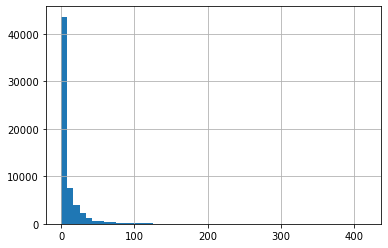

In [36]:
##import and concatenate datasets
##Mac:
# path = r'/Users/asariversjulien/Documents/Data/CSV files/Pennings'
# all_files = glob.glob(path + "/*.csv")

# li = []

# for filename in all_files:
#     df = pd.read_csv(filename, index_col=None, header=0)
#     li.append(df)

# df = pd.concat(li, axis=0, ignore_index=True)

##PC:
path = r'C:/Users/arj26323/Documents/Data/Biomass datasets/Pennings' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

##Begin:
##Important note 2/9/2022: Need to sum all biomass measurements within each plot, then divide by quadrat area \
##Pennings measured biomass of each individual plant within quadrat - currently you are finding the average for each plant
##Will change everything

#df['Plant_Biomass'] = df['Plant_Biomass']/df['Quadrat_Area'] ##adjust to grams/m^2

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

#df = df[df['Species_Code'] == 'A1'] ##Remove all non-Spartina alterniflora plots - messes up unique coordinates section
##Need to filter out other species later!

df = df[df['Zone'] >= 0] ##Zone "-1" in 2013 needs to be addressed - refers to old plot location that was relocated

df['Plant_Biomass'].hist(bins = 50)
print(max(df['Plant_Biomass']))
df

,Plot,Zone,Site,Year,Plant_Biomass,Sample_Size,Longitude,Latitude,Quadrat_Area,Species_Code,Flowering_Status,Date
0,1,1,1,2000,516.324,23,-81.422539,31.538627,0.25,A1,0.0,2000-10-11
1,1,1,1,2001,424.416,18,-81.422539,31.538627,0.25,A1,1.0,2001-10-17
2,1,1,1,2002,259.784,16,-81.422539,31.538627,0.25,A1,0.0,2002-10-16
3,1,1,1,2004,436.332,18,-81.422539,31.538627,0.25,A1,0.0,2004-10-25
4,1,1,1,2005,649.300,25,-81.422539,31.538627,0.25,A1,0.0,2005-10-24
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,64,1,6,2018,809.024,15,-81.279858,31.388000,0.25,A1,0.0,2018-10-12
3212,64,1,6,2019,295.636,8,-81.279858,31.388000,0.25,A1,0.0,2019-10-09
3213,65,1,1,2017,620.504,26,-81.422320,31.538420,0.25,A1,1.0,2017-10-14
3214,65,1,1,2018,276.676,20,-81.422320,31.538420,0.25,A1,0.0,2018-10-13


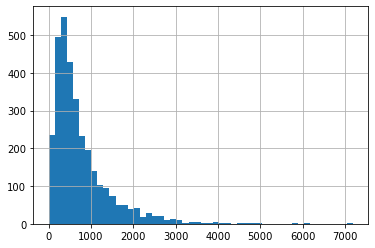

In [3]:
##Sum biomass

# df = df[df['Species_Code'] == 'A1'] ##Remove non-Spartina alterniflora species

df_sum = df.groupby(['Plot', 'Zone', 'Site', 'Year'], as_index = False).aggregate({'Plant_Biomass':[np.sum, np.size], \
    'Longitude':[np.mean], 'Latitude':[np.mean], 'Quadrat_Area':[np.mean], 'Species_Code':'first', 'Flowering_Status':'first', \
    'Date':'first'}) ##(:[np.mean] thrown in to detect differences within plot, though there shouldn't be any)

df_sum.columns = ['Plot','Zone','Site','Year','Plant_Biomass', 'Sample_Size', 'Longitude', 'Latitude', \
               'Quadrat_Area', 'Species_Code','Flowering_Status', 'Date']

df_sum['Plant_Biomass'] = df_sum['Plant_Biomass']/df_sum['Quadrat_Area']

df_sum['Plant_Biomass'].hist(bins = 50) ##Note: Greatest biomass plots are not S. alterniflora - will be removed
df_sum

##note: df_sum is cross-referenced with raw data from Pennings - biomass and lat/long are correct

,Zone,Site,Year,Mean_Biomass,Sample_Size,Std_Biomass,Longitude,Latitude,Quadrat_Area,Species_Code,Flowering_Status,Date,SE_Biomass
0,1,1,2000,690.3910,8,258.763177,-81.422370,31.538510,0.2500,A1,0.0,2000-10-11,91.486598
1,1,1,2001,674.2440,8,323.092134,-81.422370,31.538510,0.2500,A1,1.0,2001-10-17,114.230319
2,1,1,2002,774.9750,8,587.820341,-81.422370,31.538510,0.2500,A1,0.0,2002-10-16,207.825874
3,1,1,2004,469.3465,8,250.973879,-81.422370,31.538510,0.2500,A1,0.0,2004-10-25,88.732666
4,1,1,2005,1492.8820,8,746.511111,-81.422370,31.538510,0.2500,A1,0.0,2005-10-24,263.931534
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,3,10,2014,478.0420,8,190.514469,-81.270696,31.477178,0.0625,A3,0.0,2014-10-18,67.357037
398,3,10,2015,594.9720,8,245.332173,-81.270696,31.477178,0.0625,A1,0.0,2015-10-24,86.738022
399,3,10,2016,442.7480,8,175.305096,-81.270696,31.477178,0.0625,A3,0.0,2016-10-27,61.979711
400,3,10,2017,520.3380,8,195.399832,-81.270696,31.477178,0.0625,A3,0.0,2017-10-21,69.084273


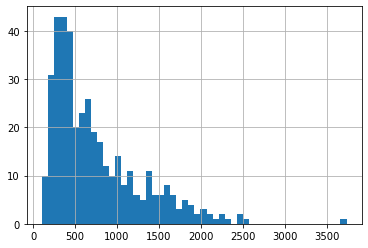

In [4]:
#df['Plant_Biomass'].hist(by=df['Year'])

df2 = df_sum.groupby(['Zone', 'Site', 'Year'], as_index = False).aggregate({'Plant_Biomass':[np.mean, np.size, np.std], \
    'Longitude':[np.mean], 'Latitude':[np.mean], 'Quadrat_Area':'first', 'Species_Code':'first', 'Flowering_Status':'first', \
    'Date':[np.mean]}) 
##grouping by zone, average the plots together (along with lat/long in df_sum) - this will be used to scale up to landsat data
##Average plot coordinates together! In previous step (df_sum from df) all coordinates were the same within grouping

df2.columns = ['Zone','Site','Year','Mean_Biomass', 'Sample_Size', 'Std_Biomass', 'Longitude', 'Latitude', \
               'Quadrat_Area', 'Species_Code','Flowering_Status', 'Date']

df2['SE_Biomass'] = df2['Std_Biomass']/np.sqrt(df2['Sample_Size'])

df2['Mean_Biomass'].hist(bins = 50)

df2
# df3 = df.groupby(['Plot', 'Zone', 'Site', 'Year'], as_index = False).mean()
# site_list = [7]
# df4 = df[df['Site'].isin(site_list)]
##site 7 seems to have the highest biomass
# list(df2) ##need to rename columns

In [5]:
dfx = df.groupby(['Site'], as_index = False).mean()
dfx = dfx[['Site', 'Longitude', 'Latitude']]
dfx
##lat/lon - these average lat/longs are used in GEE script! They are the points used in analysis. Lats/longs for \
##individual plots are shown in the df_plots dataframe below

,Site,Longitude,Latitude
0,1,-81.422318,31.539096
1,2,-81.295564,31.535967
2,3,-81.229141,31.518847
3,4,-81.365805,31.451791
4,5,-81.340722,31.435814
5,6,-81.280011,31.387962
6,7,-81.478498,31.334813
7,8,-81.415535,31.308242
8,9,-81.333707,31.351518
9,10,-81.270863,31.476948


In [6]:
##All coordinates (does not work if df is filtered to only Spartina alterniflora)
# longx = df['Longitude'].unique()
# latx = df['Latitude'].unique()

# unique_coordinates = pd.DataFrame(latx, longx)

# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#     print(unique_coordinates)

In [48]:
##Unique values for dates - match with imagery in GEE
print(df['Year'].unique())
df_z = df.groupby('Year')['Day'].unique()

print(df_z)

##Locations of each plot, for each zone/site, on each sampling date
lat_x = df.groupby(['Year','Day', 'Site', 'Zone', 'Plot'], as_index=False)['Latitude'].mean()
# print(lat_x)

long_x = df.groupby(['Year','Day', 'Site', 'Zone', 'Plot'], as_index=False)['Longitude'].mean()
# print(long_x)

df_plots = pd.merge(lat_x, long_x)
print(df_plots) ##there is a better way of doing this than averaging - can you confirm?

##Export df_plots as CSV file - to then load in GEE-GA file
in_fc = df_plots
out_dir = os.path.expanduser('~/Documents/Data/Biomass datasets/Sapelo')
out_csv = os.path.join(out_dir, 'GA_allplots.csv')
#df_plots.to_csv(out_csv, index = False)

print("feesh")
print(len(df_plots['Longitude'].unique()))
print(len(df_plots['Latitude'].unique()))

[2000 2001 2002 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014
 2015 2016 2017 2018 2019]
Year
2000    [11, 18, 10, 12, 13, 17, 16]
2001           [17, 15, 16, 8, 5, 9]
2002    [16, 18, 20, 15, 19, 14, 17]
2004                [25, 22, 24, 23]
2005        [24, 27, 22, 26, 21, 23]
2006                [16, 17, 15, 14]
2007            [22, 23, 24, 21, 20]
2008                [27, 28, 26, 25]
2009                [16, 15, 17, 14]
2010                [19, 20, 21, 18]
2011                [25, 27, 24, 26]
2012                [13, 14, 15, 12]
2013            [16, 18, 13, 15, 14]
2014        [17, 16, 18, 20, 21, 15]
2015    [20, 22, 25, 21, 15, 23, 24]
2016            [26, 25, 23, 24, 27]
2017        [14, 18, 19, 23, 16, 20]
2018    [13, 17, 14, 19, 12, 15, 16]
2019             [4, 11, 9, 8, 7, 5]
Name: Day, dtype: object
      Year  Day  Site  Zone  Plot   Latitude  Longitude
0     2000   10     4     1     1  31.451676 -81.365498
1     2000   10     4     1     2  31.451548 -81.365560
2

In [42]:
# sns.scatterplot( x = 'Date', y = 'Plant_Biomass', hue = 'Site', data = df[df['Species_Code'] == 'A1'])

In [9]:
##Exporting coordinates

out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'plotcoord.csv')

#df_plots.to_csv(out_csv)

In [10]:
##Create dataframe with both biomass and band data from gee
##Important note: GA_bands vs GA_avtest are now different versions of same process - ga_bands was created (1/2)
##before I realized I needed to sum within each plot first. Recommend removing. (2/2)

##NOTE 2/9/22: need to recalculate ga_bands - not set up to merge with 
#ga_bands = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/ga_bands.csv')

ga_avbands = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Sapelo/ga_avtest.csv')
master_plots = pd.merge(ga_avbands, df2) ##exported as csv; can re-upload, if need be

##Remove non-Spartina alterniflora rows (should be around 2400 rows, down from 3215)
master_plots = master_plots[master_plots['Species_Code'] == 'A1']
df = master_plots

year_dict = {
    '10_':'2010x_',
    '11_':'2011x_',
    '12_':'2012x_',
    '13_':'2013x_',
    '14_':'2014x_',
    '15_':'2015x_',
    '16_':'2016x_',
    '17_':'2017x_',
    '18_':'2018x_',
    '19_':'2019x_',
    '0_':'2000x_',
    '1_':'2001x_',
    '2_':'2002x_',
    '3_':'2003x_',
    '4_':'2004x_',
    '5_':'2005x_',
    '6_':'2006x_',
    '7_':'2007x_',
    '8_':'2008x_',
    '9_':'2009x_'
} ## 'x' added to avoid applying dictionary to unintended columns; start with 10-19 also BRUTAL

for k, v in year_dict.items():
    df.columns = df.columns.str.replace(k, v)

df.columns = df.columns.str.replace('x', '') ##removing the 'x' BRUTAL

for col in df.columns:
    print(col)

# df

#df = df.drop(df.columns[[154, 155, 158, 159, 160, 162, 163, 164, 165, 166, 167, 168, 169, 170]], axis=1) ##BRUTAL, redo
##^^above for original ga_bands (before summing plots).

df = df.drop(df.columns[[154, 157, 159, 160, 161, 162, 163, 164, 165, 166, 167]], axis=1) ##BRUTAL, redo. DID THIS WORK?????
##3-4-22: Removed all columns except for bands, year, and lat/long, then applied code below (then remerged)
##Seems like a roundabout way...
##Old work is still here, final product is GA_spectra. Most likely incorrect

##credit to stackexchange user modesitt for solving this:
ff = df.copy()  ## we will use this later
## split your variable column(s) into an identifier and value column
df = df.melt(id_vars=["Year", "Latitude", "Longitude"])
## parse the parts of {year}_A{n}
parts = df.variable.str.split("_")
df["var_year"] = parts.str[0].astype(int)
df["var_kind"] = parts.str[1]
df = df[df.var_year == df.Year] ## use your filtering criteria
ident = ["Year", "Latitude", "Longitude"]

## pivot the frame to get A{n} columns
##Asa note: changed to pivot_table() from pivot(); added 'index =' 
df = df.pivot_table(index = ident, columns="var_kind", values="value")
df = df.reset_index()
df = pd.merge(ff, df, on=ident)  ## retain original {year}_A{n}

df = pd.merge(df, master_plots) ##on=ident? seems to work fine without, just be careful
##THIS STEP NEEDS TO BE DOUBLE-CHECKED!
##Year, latitude, and longitude all disappear - is it possible to keep them in end product?

df ##exported as csv; watch for name overlap with different sections


2000_B1
2000_B2
2000_B3
2000_B4
2000_B5
2000_B6
2000_B7
2001_B1
2001_B2
2001_B3
2001_B4
2001_B5
2001_B6
2001_B7
2002_B1
2002_B2
2002_B3
2002_B4
2002_B5
2002_B6
2002_B7
2003_B1
2003_B2
2003_B3
2003_B4
2003_B5
2003_B6
2003_B7
2004_B1
2004_B2
2004_B3
2004_B4
2004_B5
2004_B6
2004_B7
2005_B1
2005_B2
2005_B3
2005_B4
2005_B5
2005_B6
2005_B7
2006_B1
2006_B2
2006_B3
2006_B4
2006_B5
2006_B6
2006_B7
2007_B1
2007_B2
2007_B3
2007_B4
2007_B5
2007_B6
2007_B7
2008_B1
2008_B2
2008_B3
2008_B4
2008_B5
2008_B6
2008_B7
2009_B1
2009_B2
2009_B3
2009_B4
2009_B5
2009_B6
2009_B7
2010_B1
2010_B2
2010_B3
2010_B4
2010_B5
2010_B6
2010_B7
2011_B1
2011_B2
2011_B3
2011_B4
2011_B5
2011_B6
2011_B7
2012_B1
2012_B2
2012_B3
2012_B4
2012_B5
2012_B6
2012_B7
2013_B1
2013_B2
2013_B3
2013_B4
2013_B5
2013_B6
2013_B7
2013_B10
2013_B11
2014_B1
2014_B2
2014_B3
2014_B4
2014_B5
2014_B6
2014_B7
2014_B10
2014_B11
2015_B1
2015_B2
2015_B3
2015_B4
2015_B5
2015_B6
2015_B7
2015_B10
2015_B11
2016_B1
2016_B2
2016_B3
2016_B4
2016_B5
2016_B6
20

,2000_B1,2000_B2,2000_B3,2000_B4,2000_B5,2000_B6,2000_B7,2001_B1,2001_B2,2001_B3,...,Site,Zone,Mean_Biomass,Sample_Size,Std_Biomass,Quadrat_Area,Species_Code,Flowering_Status,Date,SE_Biomass
0,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,1,1,690.3910,8,258.763177,0.2500,A1,0.0,2000-10-11,91.486598
1,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,1,1,674.2440,8,323.092134,0.2500,A1,1.0,2001-10-17,114.230319
2,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,1,1,469.3465,8,250.973879,0.2500,A1,0.0,2004-10-25,88.732666
3,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,1,1,1492.8820,8,746.511111,0.2500,A1,0.0,2005-10-24,263.931534
4,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,1,1,351.4110,8,113.482560,0.2500,A1,0.0,2006-10-16,40.122144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0315,0.0394,0.0420,0.0906,0.0659,0.2915,0.0376,0.0282,0.0401,0.0425,...,10,2,392.8120,8,135.427704,0.0625,A1,0.0,2016-10-27,47.880924
204,0.0315,0.0394,0.0420,0.0906,0.0659,0.2915,0.0376,0.0282,0.0401,0.0425,...,10,2,595.2660,8,240.200103,0.0625,A1,0.0,2017-10-19,84.923561
205,0.0315,0.0394,0.0420,0.0906,0.0659,0.2915,0.0376,0.0282,0.0401,0.0425,...,10,2,465.1460,8,202.553472,0.0625,A1,0.0,2019-10-05,71.613467
206,0.0361,0.0487,0.0495,0.1084,0.1146,0.2920,0.0592,0.0306,0.0401,0.0425,...,10,3,752.1860,8,204.014064,0.0625,A1,0.0,2008-10-26,72.129864


In [11]:
##Massaging the data
df['Sensor'] = np.where(df['Year']<2013, 'Landsat 5', 'Landsat 8')

df['ndvi'] = np.where(df['Sensor'] == 'Landsat 5', (df['B4']-df['B3'])/(df['B4']+df['B3']), \
                      (df['B5']-df['B4'])/(df['B5']+df['B4'])) ##ndvi conditional based on whether sensor is Landsat-5 or 8

df['Blue_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B1'], df['B2'])
df['Green_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B2'], df['B3'])
df['Red_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B3'], df['B4'])
df['NIR_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B4'], df['B5'])
df['SWIR1_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B5'], df['B6'])
df['SWIR2_band'] = np.where(df['Sensor'] == 'Landsat 5', df['B7'], df['B7'])

df

##Note: Landsat 5 from 2011-2013 was with the MSS; may have to remove
##Another note: NOT EXACT MATCHES BETWEEN L5 AND L8! May need to create separate models

,2000_B1,2000_B2,2000_B3,2000_B4,2000_B5,2000_B6,2000_B7,2001_B1,2001_B2,2001_B3,...,Date,SE_Biomass,Sensor,ndvi,Blue_band,Green_band,Red_band,NIR_band,SWIR1_band,SWIR2_band
0,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,2000-10-11,91.486598,Landsat 5,0.297571,0.0293,0.0348,0.0347,0.0641,0.0540,0.0333
1,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,2001-10-17,114.230319,Landsat 5,0.338997,0.0286,0.0451,0.0389,0.0788,0.0844,0.0532
2,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,2004-10-25,88.732666,Landsat 5,0.410559,0.0321,0.0380,0.0374,0.0895,0.0748,0.0410
3,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,2005-10-24,263.931534,Landsat 5,0.545648,0.0265,0.0314,0.0321,0.1092,0.0647,0.0350
4,0.0293,0.0348,0.0347,0.0641,0.0540,0.2906,0.0333,0.0286,0.0451,0.0389,...,2006-10-16,40.122144,Landsat 5,0.341253,0.0622,0.0672,0.0610,0.1242,0.1149,0.0655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0315,0.0394,0.0420,0.0906,0.0659,0.2915,0.0376,0.0282,0.0401,0.0425,...,2016-10-27,47.880924,Landsat 8,0.426931,0.0461,0.0604,0.0549,0.1367,0.1094,0.0613
204,0.0315,0.0394,0.0420,0.0906,0.0659,0.2915,0.0376,0.0282,0.0401,0.0425,...,2017-10-19,84.923561,Landsat 8,0.433846,0.0325,0.0411,0.0368,0.0932,0.0731,0.0405
205,0.0315,0.0394,0.0420,0.0906,0.0659,0.2915,0.0376,0.0282,0.0401,0.0425,...,2019-10-05,71.613467,Landsat 8,0.413559,0.0295,0.0384,0.0346,0.0834,0.0555,0.0303
206,0.0361,0.0487,0.0495,0.1084,0.1146,0.2920,0.0592,0.0306,0.0401,0.0425,...,2008-10-26,72.129864,Landsat 5,0.311594,0.0331,0.0427,0.0475,0.0905,0.0928,0.0597


In [12]:
##Export master_plots as CSV file
in_fc = df
out_dir = os.path.expanduser('~/Documents/Data/Biomass datasets/Sapelo')
out_csv = os.path.join(out_dir, 'GA_spectra_FINAL_3-4-22.csv')
#df.to_csv(out_csv, index = False)

In [31]:
##Allometry data - the plant height/biomass relationship - hidden for now, just uncomment to see plots
# allom_df = pd.read_csv('C:/Users/arj26323/Documents/Data/Biomass datasets/Pennings/Original data/Pennings_Allometry.csv', \
#                        skiprows = [0,1,3,4])
# allom_df = allom_df[allom_df['Species_Code'] == 'A1'] ##Remove all non-Spartina alterniflora plots; N now is 757 (not 1139)

# print(allom_df)
# print(len(allom_df['Plant_Mass']))

# g = sns.FacetGrid(allom_df, col = 'Site')
# g = (g.map(sns.scatterplot, 'Shoot_Height', 'Plant_Mass').add_legend())
# plt.show()

# g2 = sns.scatterplot(x = 'Shoot_Height', y = 'Plant_Mass', data = allom_df)
# plt.show()
##equation for relationship: ln(Biomass) = constant + htslope*ln(Plant_Height) + flslope*ln(Flowering_Status)
##this equation changes between sites, species, and years; see metadata (search 'allom' until you find it)
##Spartina alterniflora (A1) only done in 2002


In [30]:
##NEW ALLPLOTS CSV
allplots_av = df_sum.groupby(['Plot','Zone', 'Site', 'Year'], as_index = False).aggregate({\
    'Longitude':'first', 'Latitude':'first'}) 

allplots_av.columns = ['Plot','Zone','Site','Year','Longitude', 'Latitude']

allplots_av
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  ## more options can be specified also
    print(allplots_av)

      Plot  Zone  Site  Year  Longitude   Latitude
0        1     1     1  2000 -81.422539  31.538627
1        1     1     1  2001 -81.422539  31.538627
2        1     1     1  2002 -81.422539  31.538627
3        1     1     1  2004 -81.422539  31.538627
4        1     1     1  2005 -81.422539  31.538627
5        1     1     1  2006 -81.422539  31.538627
6        1     1     1  2007 -81.422539  31.538627
7        1     1     1  2008 -81.422539  31.538627
8        1     1     1  2009 -81.422539  31.538627
9        1     1     1  2010 -81.422539  31.538627
10       1     1     1  2011 -81.422539  31.538627
11       1     1     1  2012 -81.422539  31.538627
12       1     1     1  2013 -81.422539  31.538627
13       1     1     1  2014 -81.422539  31.538627
14       1     1     1  2015 -81.422539  31.538627
15       1     1     1  2016 -81.422539  31.538627
16       1     1     1  2017 -81.422539  31.538627
17       1     1     1  2018 -81.422539  31.538627
18       1     1     1  2019 -8

In [40]:
##AllPLOTS 
print(len(allplots_av['Latitude'].unique()))
print(len(allplots_av['Longitude'].unique())) ##WHY is this so different??? Same as df_plots, up earlier


500
260


In [15]:
##Export CSV file to then load as feature class
in_fc = allplots_av
out_dir = os.path.expanduser('~/Documents/Data/Biomass datasets/Sapelo')
out_csv = os.path.join(out_dir, 'allplots_av.csv')
#allplots_av.to_csv(out_csv, index = False)
#print(df)

##Export CSV file
out_dir = os.path.expanduser('~/Downloads')
out_csv = os.path.join(out_dir, 'xxx.csv')
#master_plots.to_csv(out_csv, index = False)
#print(df)